In [1]:
from Manipulator2DMap.Map import GridMap2D
from Manipulator2DMap.Manipulator2D import Manipulator_2d_supervisor, PI
from Manipulator2DMap.obstacle import SphereObstacle
from AStarDefaults.AStar import AStar, make_path

import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import heapq
from matplotlib.widgets import Slider
from ipywidgets import interact

%matplotlib inline

In [2]:
N_JOINTS = 4

args_dict = {
    'num_joints': N_JOINTS,
    'lengths': [10, 6, 6, 6],
    'angle_discretization': 180,
    'angles_constraints': np.array([PI / 6] * N_JOINTS)
}

In [3]:
manipulator = Manipulator_2d_supervisor(**args_dict)

state = manipulator.generate_random_state()
state

array([1.01229097, 0.17453293, 1.74532925, 1.53588974])

In [4]:
goal_position = ((-10, 5.5), 2 * PI/ 3)

manipulator = Manipulator_2d_supervisor(**args_dict)

In [5]:
obstacles = []

sphere_obstacle1 = SphereObstacle(np.array([-5, 5]), 3)
obstacles.append(sphere_obstacle1)

sphere_obstacle2 = SphereObstacle(np.array([-9, 10]), 2)
obstacles.append(sphere_obstacle2)

# sphere_obstacle3 = SphereObstacle(np.array([-7, 8]), 2)
# obstacles.append(sphere_obstacle3)

In [6]:
space_map = GridMap2D(manipulator, state, goal_position, obstacles=obstacles)

print goal position [-10.    5.5]


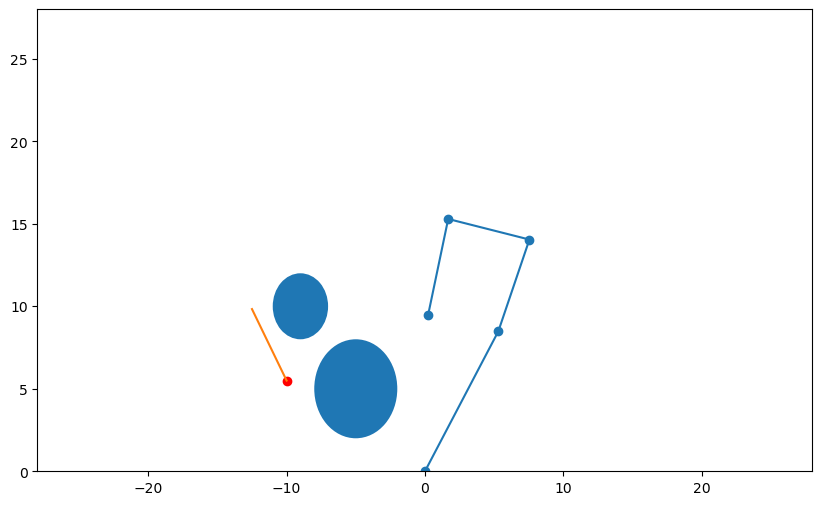

In [7]:
goal_cords = goal_position[0]
goal_angle = goal_position[1]
angle_shift = np.array([np.cos(goal_angle), np.sin(goal_angle)])
another_cords = goal_cords + angle_shift * 5

if space_map.get_start() is None:
    space_map.random_init_start()

manipulator.visualize_state(space_map.get_start())
plt.scatter(goal_position[0][0], goal_position[0][1], c='r')
plt.plot([goal_cords[0], another_cords[0]], [goal_cords[1], another_cords[1]])

for sphere in space_map._obstacles:    
    c = plt.Circle(sphere.center, sphere.r)
    plt.gca().add_artist(c)

In [8]:
%time result, last_state, steps, nodes_created, OPEN, CLOSED = AStar(space_map)

step = 50000 g = 4.468042885105487 heuristic = 4.367748276798451 dist = 4.1406928084164685
step = 100000 g = 2.303834612632515 heuristic = 7.157636521725532 dist = 7.048226475989774
CPU times: user 4min 33s, sys: 401 ms, total: 4min 34s
Wall time: 4min 34s


In [9]:
path, length = make_path(last_state)

In [10]:
a = np.array([space_map._manipulator.calculate_end(st.state) for st in CLOSED])

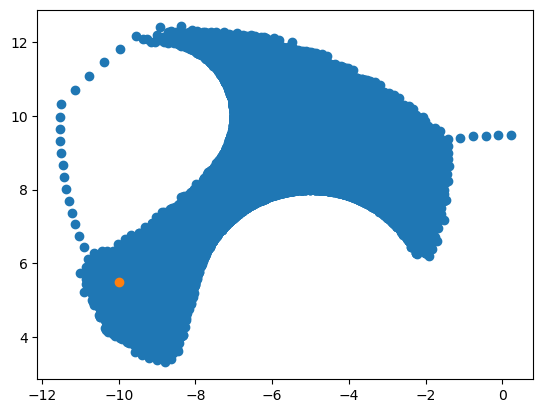

In [11]:
plt.scatter(a[:, 0], a[:,1])
plt.scatter(goal_position[0][0], goal_position[0][1])

In [12]:
goal_cords = goal_position[0]
goal_angle = goal_position[1]
angle_shift = np.array([np.cos(goal_angle), np.sin(goal_angle)])
another_cords = goal_cords + angle_shift * 5

def visualize_path_state(path_state=0):
    space_map._manipulator.visualize_state(path[path_state])
    plt.scatter(goal_cords[0], goal_cords[1], c='r')
    plt.plot([goal_cords[0], another_cords[0]], [goal_cords[1], another_cords[1]])
    for sphere in space_map._obstacles:    
        c = plt.Circle(sphere.center, sphere.r)
        plt.gca().add_artist(c)

np.set_printoptions(precision=5)
interact(visualize_path_state, path_state=(0, len(path) - 1))
plt.show()

interactive(children=(IntSlider(value=0, description='path_state', max=67), Output()), _dom_classes=('widget-i…